<center> <img src="img/hh_logo.png" alt="Head Hunter logo" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru

Учащийся: **Станислав Король**

Группа: **DST-136**

### Сокращения
* **ЗЗП** - запрашиваемая заработная плата;
* **МЗЗП** - медианная запрашиваемая заработная плата.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Исследование структуры данных

**1\.** Прочитайте данные с помощью библиотеки *Pandas*. Перед чтением обратите внимание на разделитель внутри файла.

In [2]:
# Разделитель в файле ";" 
hh_df = pd.read_csv(
    'data/dst-3.0_16_1_hh_database.csv',
    sep=';'
) 
hh_df.shape

(44744, 12)

**2\.** Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
display(hh_df.head())
display(hh_df.tail())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


**3\.** Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

**4\.** Обратите внимание на информацию о числе непустых значений.

In [4]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

**5\.** Выведите основную статистическую информацию о столбцах.

In [5]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

**1\.** Начнём с простого — с признака «Образование и ВУЗ». Его текущий формат — это: <Уровень образования год выпуска ВУЗ специальность...>. Например:
* Высшее образование 2016 Московский авиационный институт (Национальный исследовательский университет);
* Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота.

Нас будет интересовать **только уровень образования**. Причём, для простоты мы будем считать, что соискатель указывает свой максимальный уровень образования в первых трёх словах столбца “Образование и ВУЗ”.

Создайте с помощью функции-преобразования новый признак «Образование», который должен иметь четыре категории: «высшее», «неоконченное высшее», «среднее специальное» и «среднее».

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Образование и ВУЗ».

*Совет первый:* Обратите внимание на структуру текста в столбце «Образование и ВУЗ». Гарантируется, что текущий уровень образования соискателя всегда отражён в первых двух словах и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет второй:* Проверяйте полученные категории, например с помощью метода unique().

In [6]:
def education_level(raw_str):
    levels = {
        'Высшее образование': 'высшее',
        'Неоконченное высшее': 'неоконченное высшее',
        'Среднее специальное': 'среднее специальное',
        'Среднее образование': 'среднее'
    }
    result = None
    for i in levels:
        if raw_str.startswith(i):
            result = levels[i]
    return result


hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(education_level)
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)

**2\.** Теперь нас интересует столбец «Пол, возраст». Его текущий формат: <Пол , возраст, дата рождения>. Например:
* Мужчина , 39 лет , родился 27 ноября 1979;
* Женщина , 21 год , родилась 13 января 2000.

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

**Создайте два новых признака «Пол» и «Возраст».** При этом важно учесть:
* Признак пола должен иметь два уникальных строковых значения: **М** — мужчина, **Ж** — женщина;
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Пол, возраст» из таблицы.

*Совет:* Обратите внимание на структуру текста в столбце, а точнее на то, как разделены параметры пола, возраста и даты рождения между собой — символом ' , '.

Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.

In [7]:
def age(raw_str):
    raw_age = raw_str.split(' , ')[1]
    age = raw_age.split()[0]
    return age


hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x[0])
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(age).astype(int)

hh_df = hh_df.drop('Пол, возраст', axis=1)

**3\.** Следующим этапом преобразуем признак «Опыт работы». Его текущий формат: <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовём «Опыт работы (месяц)».

Для начала обсудим условия решения задачи:
1. Во-первых, в данном признаке есть пропуски. Условимся, что, если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает **NaN**);
2. Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значение «Не указано». Их тоже обозначим как **NaN** (функция-преобразование возвращает **NaN**);
3. В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях);
4. В-четвёртых, у нас есть проблема: опыт работы может быть представлен только в годах или только в месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца;
    * Опыт работы 4 года;
    * Опыт работы 11 месяцев.

Учитывайте эту особенность в вашем коде.

**В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.**

Выполните преобразование и удалите столбец «Опыт работы» из таблицы.

In [8]:
def work_experience(raw_str):
    exp_months = None

    if pd.notnull(raw_str) and raw_str != 'Не указано':
        exp_raw = raw_str.split('  ')[0]
        exp_mon_raw = exp_raw.split()[2:]
        if len(exp_mon_raw) == 4:
            years = int(exp_mon_raw[0])
            months = int(exp_mon_raw[2])
            exp_months = years * 12 + months
        elif len(exp_mon_raw) == 2 and exp_mon_raw[1].startswith('м'):
            exp_months = int(exp_mon_raw[0])
        elif len(exp_mon_raw) == 2 and not exp_mon_raw[1].startswith('м'):
            exp_months = int(exp_mon_raw[0]) * 12

    return exp_months


hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(work_experience)

hh_df = hh_df.drop('Опыт работы', axis=1)

**4\.** Хорошо идём! :) Следующий на очереди — признак «Город, переезд, командировки». Информация в нём представлена в следующем виде: <Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>.

В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам;
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам;
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам.

**Создадим отдельные признаки «Город», «Готовность к переезду», «Готовность к командировкам». При этом важно учесть:**

⛏ Признак «Город» может содержать только четыре категории: «Москва», «Санкт-Петербург» и «город-миллионник» (их список ниже), остальные обозначьте как «другие».

Список городов-миллионников:
    
`million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']`
    
Информация о метро, рядом с которым проживает соискатель, нас не интересует.

⛏ Признак «Готовность к переезду» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке «Город, переезд, командировки». Например:
    * … , готов к переезду , …;
    * … , не готова к переезду , …;
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону);
    * … , хочу переехать (США) , ….
    
Нас интересует только сам факт возможности/желания переезда.

⛏ Признак «Готовность к командировкам» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке «Город, переезд, командировки». Например:
    * … , готов к командировкам , …;
    * … , готова к редким командировкам , …;
    * … , не готов к командировкам , ….
    
Нас интересует только сам факт готовности к командировке.
    
**Ещё один важный момент:** при выгрузке данных у некоторых соискателей «потерялась» информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
**Выполните преобразования и удалите столбец «Город, переезд, командировки» из таблицы.**

*Совет:* Обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учтите это, если будете использовать порядок слов в своей программе.

In [9]:
def city_name(raw_str):
    main_cities = ['Москва', 'Санкт-Петербург']
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
        'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск',
        'Пермь', 'Воронеж', 'Волгоград'
    ]

    city_raw = raw_str.split(' , ')[0]
    city_raw = city_raw.split('(')[0]
    city = city_raw.strip()

    if city in main_cities:
        city = city
    elif city in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'

    return city


def set_flag(raw_str, key_word, default):
    flag = default

    raw_list = raw_str.split(' , ')
    for i in raw_list:
        if key_word in i:
            if not i.startswith('не'):
                flag = True
            else:
                flag = False
            break
    return flag


hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(city_name)

hh_df['Готовность к переезду'] = \
    hh_df['Город, переезд, командировки'].apply(
        set_flag,
        args=('перее', None)
    )

hh_df['Готовность к командировкам'] = \
    hh_df['Город, переезд, командировки'].apply(
        set_flag,
        args=('командировкам', False)
    )

hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

**5\.** Рассмотрим поближе признаки «Занятость» и «График».

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтёрство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удалённая работа, вахтовый метод).

На сайте *hh.ru* соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость;
* частичная занятость, проектная работа, волонтёрство;
* полный день, удалённая работа;
* вахтовый метод, гибкий график, удалённая работа, полная занятость.

Такой вариант признаков имеет множество различных комбинаций, а значит, множество уникальных значений, что мешает анализу. Нужно это исправить!

**Давайте создадим признаки-«мигалки» для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе — False.**

Такой метод преобразования категориальных признаков называется **One Hot Encoding**, его схема представлена на рисунке ниже:

<img src="img/ohe.jpg" alt="Схема One Hot Encoding">

**Выполните данное преобразование для признаков «Занятость» и «График», ответьте на контрольные вопросы, после чего удалите их из таблицы.**

In [10]:
ohe_columns = ['Занятость', 'График']

for column in ohe_columns:
    features = set(
        hh_df[column].apply(
            lambda x: x.split(', ')
            ).sum()
        )
    features = [i.capitalize() for i in features]
    for f in features:
        hh_df[f] = hh_df[column].apply(lambda x: f.lower() in x)

hh_df = hh_df.drop(['Занятость', 'График'], axis=1)

**6\.** Наконец, мы добрались до самого главного — признака заработной платы «ЗП».

В чём наша проблема? — В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он хотел бы её получать, например:
* 30 000 руб.;
* 50 000 грн.;
* 550 USD.

Нам бы хотелось видеть заработную плату в единой валюте, например в рублях. Возникает вопрос: а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации: от обращения к *API* Центробанка, до использования специальных библиотек, например [pycbrf](https://github.com/idlesign/pycbrf). Однако в рамках нашего проекта эти темы мы рассматривать не будем.

Поэтому просто обратимся к профильным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, [MDF.RU](https://mfd.ru/export/#Alias=false&Period=1&timeframeValue=1&timeframeDatePart=day&StartDate=04.10.2021&EndDate=04.10.2021&SaveFormat=0&SaveMode=0&FieldSeparator=%253b&DecimalSeparator=.&DateFormat=yyyyMMdd&TimeFormat=HHmmss&AddHeader=true&RecordFormat=0&Fill=false): данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019: скачать её вы можете **на платформе**.

**Создайте новый DataFrame из скачанного файла.** В полученной таблице нас будут интересовать столбцы:
* *currency* - наименование валюты в ISO-кодировке;
* *date* - дата;
* *proportion* - пропорция; 
* *close* - цена закрытия (последний зафиксированный курс валюты на указанный день).

Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в файле с курсами валют.

**Пропорция** - это число, отражающее, скольким единицам валюты соответствует курс в таблице с курсами. Например для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен: 17.197 / 100 = 0.17197 руб. за 1 тенге.

Воспользуйтесь этой информацией в ваших преобразованиях.

| Наименование валюты в данных | Наименование валюты в ISO-кодировке | Пропорция | Расшифровка |
|-|-|-|-|
| грн | UAH | 10 | гривна |
| USD | USD | 1 | доллар |
| EUR | EUR | 1 | евро |
| белруб | BYN | 1 | белорусский рубль |
| KGS | KGS | 10 | киргизский сом |
| сум | UZS | 10 000 | узбекский сум |
| AZN | AZN | 1 | азербайджанский манат |
| KZT | KZT | 100 | казахстанский тенге |

Осталось только понять, откуда брать дату, по которой определяется курс. А вот же она — в признаке «Обновление резюме» содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак «ЗП (руб)» — заработная плата в рублях.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак «Обновление резюме» из таблицы с резюме в формат *datetime* и достать из него дату. В тот же формат привести признак *date* из таблицы с валютами. Обратите внимание на формат даты в исходных столбцах (день-месяц-год), учтите этот факт при преобразовании;
2. Выделить из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт *ISO* согласно таблице выше;
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение *close* для рубля заполнить единицей 1 (курс рубля самого к себе);
4. Умножить сумму желаемой заработной платы на присоединённый курс валюты (*close*) и разделить на пропорцию. Обратите внимание на пропуски после объединения в этих столбцах. Результат занести в новый столбец «ЗП (руб)».

In [11]:
def currency_iso(raw_str):
    currency_dict = {
        'руб.': 'RUB', 'бел.руб.': 'BYN', 'грн.': 'UAH', 'сум': 'UZS'
    }
    raw_currency = raw_str.split()[1]
    if raw_currency in currency_dict:
        return currency_dict[raw_currency]
    else:
        return raw_currency


rates_df = pd.read_csv('data/ExchangeRates.csv')
rates_df = rates_df.drop(['per', 'time', 'vol'], axis=1)

# Приводим даты к единому формату
hh_df['Обновление резюме'] = pd.to_datetime(
    hh_df['Обновление резюме'],
    dayfirst=True
).dt.date
rates_df['date'] = pd.to_datetime(rates_df['date'], dayfirst=True).dt.date

# Делим заработную плату на тип валюты и сумму
hh_df['валюта'] = hh_df['ЗП'].apply(currency_iso)
hh_df['ЗП'] = hh_df['ЗП'].apply(lambda x: int(x.split()[0]))

# Объединяем таблицы курсов и основной массив данных
hh_df = hh_df.merge(
    rates_df,
    left_on=['Обновление резюме', 'валюта'],
    right_on=['date', 'currency'],
    how='left'
)

# Заполняем курс и пропорцию для заработных плат в рублях
hh_df[['close', 'proportion']] = hh_df[['close', 'proportion']].fillna(1)

# Переводим значения заработных плат в рубли
hh_df['ЗП (руб)'] = hh_df['ЗП']*hh_df['close'] / hh_df['proportion']

hh_df = hh_df.drop(['date', 'currency'], axis=1)

# Исследование зависимостей в данных

**1\.** Постройте распределение признака «Возраст». Опишите распределение, отвечая на следующие вопросы:
* Чему равна мода распределения?
* Каковы предельные значения признака, в каком примерном интервале находится возраст **большинства** соискателей?
* Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?

*Совет:* Постройте гистограмму и коробчатую диаграмму рядом.

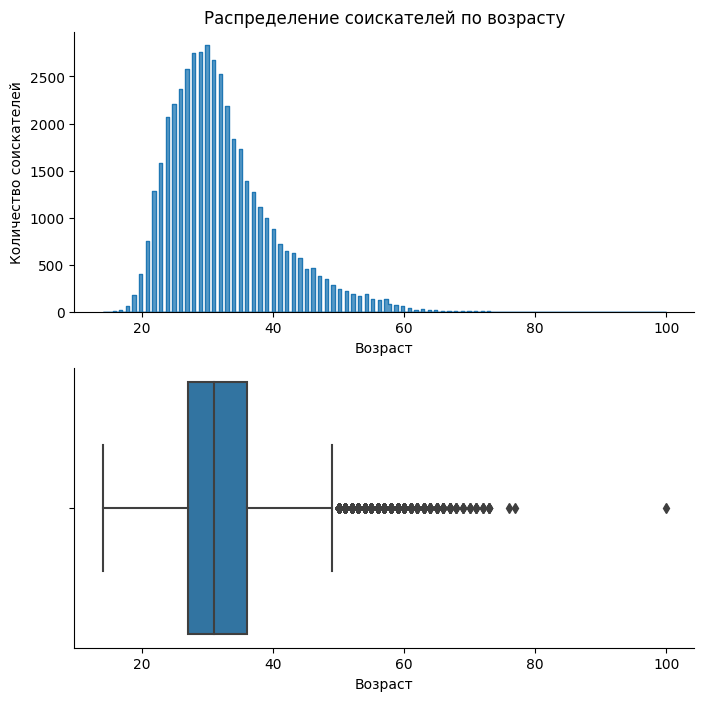

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

histplot = sns.histplot(
    data=hh_df,
    x='Возраст',
    element='step',
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по возрасту')
histplot.set_ylabel('Количество соискателей')

boxplot = sns.boxplot(
    data=hh_df,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1]
)
sns.despine()

**Вывод:** Модальное значение возраста соискателей равно 30-ти годам, соответственно чаще всего в наборе данных встречаются люди, которым 30 лет. Основной части (52 процентам) соискателей от 27-ми до 36-ти лет. Двум самым молодым соискателями - 15 лет, опыт работы и запрос по зарплате соответствует их возрасту (смущает только должность у одного из них - "Менеджер по работе с клиентами"). Соискатель, которому - 14 лет с опытом работы в 477 месяцев, является аномалией (возможно опечатка). Самому мудрому соискателю набора данных - 77 лет. Его конкурент, которому 100 лет с опытом работы в 60 месяцев, является аномалией (возможно, опечатка).

**2\.** Постройте распределение признака «Опыт работы (месяц)». Опишите распределение, отвечая на следующие вопросы:
* Чему равна мода распределения?
* Каковы предельные значения признака, в каком примерном интервале находится опыт работы **большинства** соискателей?
* Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?

*Совет:* Постройте гистограмму и коробчатую диаграмму рядом.

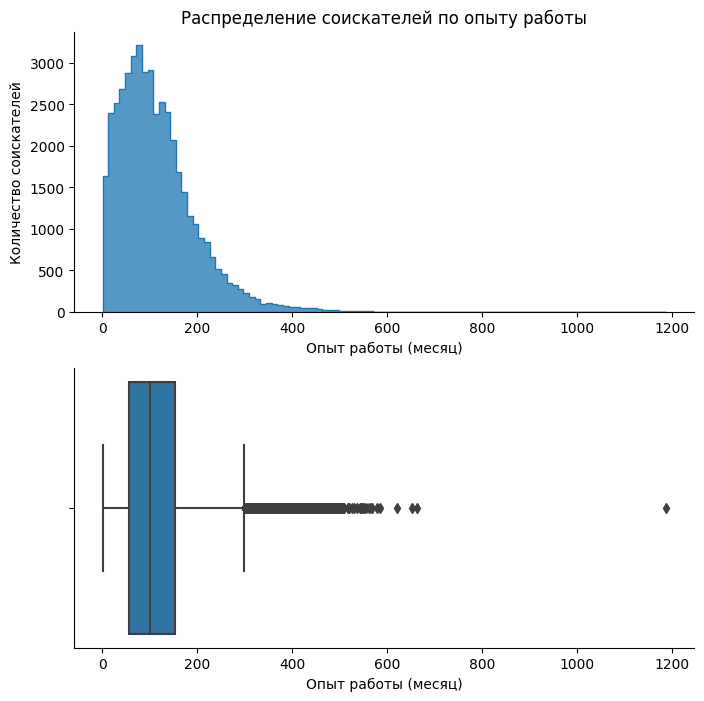

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

histplot = sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    element='step',
    bins=100,
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по опыту работы')
histplot.set_ylabel('Количество соискателей')

boxplot = sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1]
)
sns.despine()

**Вывод:** Модальное значение опыта работы соискателей - 100 месяцев, соответственно чаще всего в наборе данных встречаются люди, у которых опыт работы - 100 месяцев (около 8-ми лет). У основной части (50 процентов) соискателей опыт работы от 57-ми до 154-х месяцев. Минимальное количество рабочего опыта - 1 месяц, аномалий в минимальной части не наблюдается. Максимальный опыт - 663 месяца. 48-летний соискатель с опытом в 1188 месяцев (99 лет) - является аномалией (возможно опечатка).

**3\.** Постройте распределение признака «ЗП (руб)». Опишите распределение, отвечая на следующие вопросы:
* Чему равна мода распределения?
* Каковы предельные значения признака, в каком примерном интервале находится заработная плата **большинства** соискателей?
* Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

*Совет:* Постройте гистограмму и коробчатую диаграмму рядом.

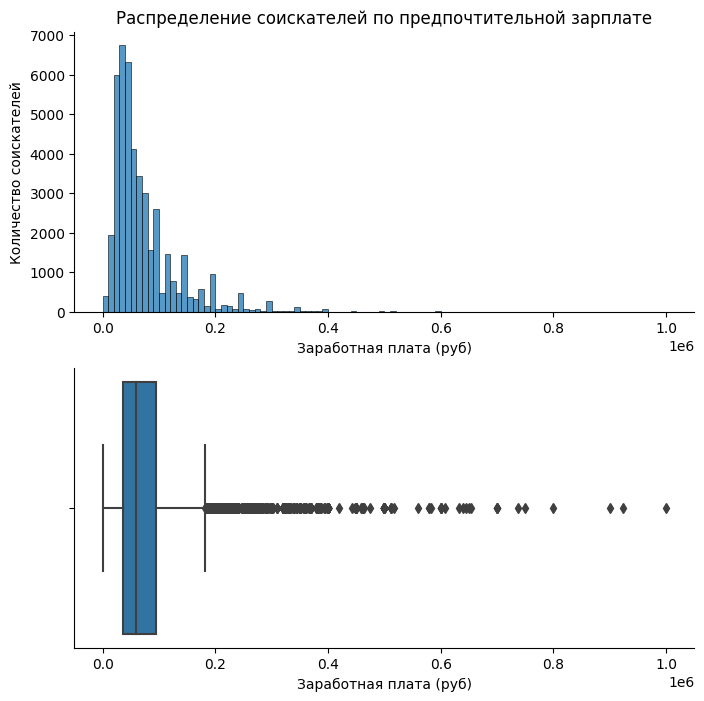

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

histplot = sns.histplot(
    data=hh_df[hh_df['ЗП (руб)'] <= 1000000],
    x='ЗП (руб)',
    bins=100,
    ax=axes[0]
)
histplot.set_title('Распределение соискателей по предпочтительной зарплате')
histplot.set_xlabel('Заработная плата (руб)')
histplot.set_ylabel('Количество соискателей')

boxplot = sns.boxplot(
    data=hh_df[hh_df['ЗП (руб)'] <= 1000000],
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot.set_xlabel('Заработная плата (руб)')
sns.despine()

**Вывод\***: Модальное значение запрашиваемой заработной платы (далее **ЗЗП**) соискателями - 50.000 рублей, соответственно чаще всего в соискатели запрашивают - 50.000 рублей. Основная часть (50 процентов) соискателей запрашивают от 37 до 95 тыс. рублей в месяц. Аномалиями в минимальных значениях являются *ЗЗП* в 1 руб. (12 человек), так же можно считать аномалиями заработные платы менее 550 рублей (это меньше дневной минимальной рабочей оплаты труда РФ) - 64 человек (возможно, опечатка). Максимальная *ЗЗП* 1 млн. руб. у 5-ти человек - аномалии (возможно, опечатка).

**\*Примечание**: Графики построены для заработных плат меньших или равных 1.000.000 руб, иначе графики сложно анализировать.

**4\.** Постройте диаграмму, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»).

Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по представленной диаграмме:
* Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
* Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

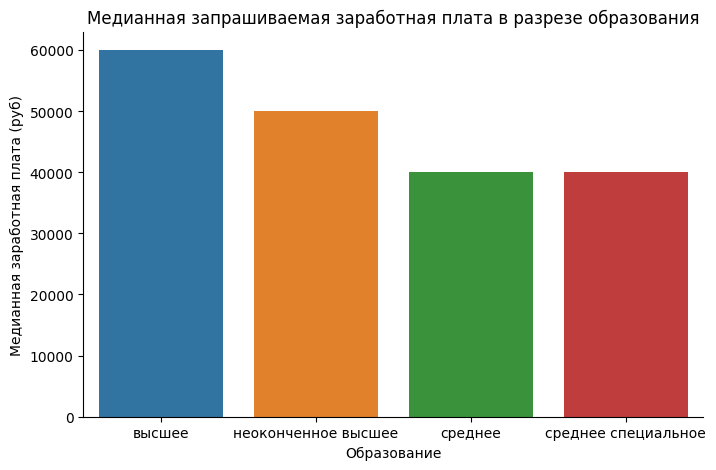

In [15]:
salary_mask = hh_df['ЗП (руб)'] < 1000000

education_salary = hh_df[salary_mask].groupby(
    'Образование',
    as_index=False
)['ЗП (руб)'].median()

fig, axes = plt.subplots(figsize=(8, 5))

barplot = sns.barplot(
    data=education_salary,
    x='Образование',
    y='ЗП (руб)',
    ci=None
)
barplot.set_title(
    'Медианная запрашиваемая заработная плата в разрезе образования'
)
barplot.set_ylabel('Медианная заработная плата (руб)')
sns.despine()

**Вывод:** Наименьшая медианная запрашиваемая заработная плата (далее **МЗЗП**) у соискателей со средним и средним специальным образованием - 40.000 рублей. Наибольшая у соискателей с высшим образованием - 60.000 рублей. По графику видно, что признак образования находится в прямой зависимости с уровнем *ЗЗП*, чем лучше образование - тем больше *ЗЗП*. Признак уровня образования важен при прогнозировании *ЗЗП* соискателей.

**5\.** Постройте диаграмму, которая показывает распределение желаемой заработной платы («ЗП (руб)») в зависимости от города («Город»). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по полученной диаграмме:
* Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?
* Как вы считаете, важен ли признак города при прогнозировании заработной платы?

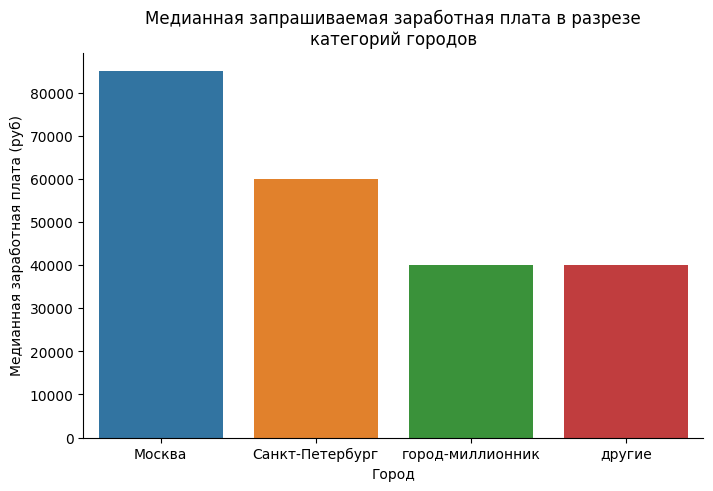

In [16]:
salary_mask = hh_df['ЗП (руб)'] < 1000000

city_salary = hh_df[salary_mask].groupby(
    'Город',
    as_index=False
)['ЗП (руб)'].median()

fig, axes = plt.subplots(figsize=(8, 5))
barplot = sns.barplot(
    data=city_salary,
    x='Город',
    y='ЗП (руб)',
    ci=None
)
barplot.set_title(
    'Медианная запрашиваемая заработная плата в разрезе\nкатегорий городов'
)
barplot.set_ylabel('Медианная заработная плата (руб)')
sns.despine()

**Вывод:** Минимальные значения *МЗЗП* в категориях "город-миллионник" и "другие" - 40.000 рублей. Максимальное значение в городе Москва - 85.000 рублей, что на 25.000 рублей больше, чем *ЗЗП* в Санкт-Петербурге. Исходя из графиков видно, что *МЗЗП* зависит от города, наибольшая в Москве, далее по величине идёт Санкт-Петербург, в городах-миллионниках и городах категории "другие" - наименьшая *МЗЗП*. Признак города важен при прогнозировании *ЗЗП* соискателей.

**6\.** Постройте многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы («ЗП (руб)») от признаков «Готовность к переезду» и «Готовность к командировкам». Проанализируйте график, сравнив уровень заработной платы по категориям.

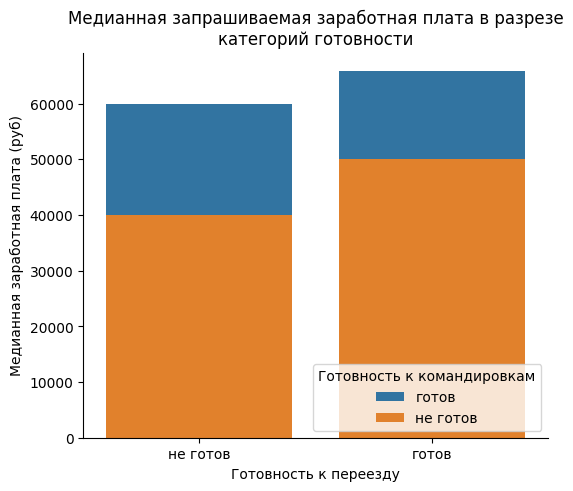

In [17]:
reloc_bt_salary = hh_df.groupby(
    ['Готовность к переезду', 'Готовность к командировкам'],
    as_index=False
)['ЗП (руб)'].median()

reloc_bt_salary['Готовность к переезду'] = \
    reloc_bt_salary['Готовность к переезду'].apply(
        lambda x: 'готов' if x else 'не готов'
    )
reloc_bt_salary['Готовность к командировкам'] = \
    reloc_bt_salary['Готовность к командировкам'].apply(
        lambda x: 'готов' if x else 'не готов'
    )

fig, axes = plt.subplots(figsize=(6, 5))
barplot = sns.barplot(
    data=reloc_bt_salary,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    hue_order=['готов', 'не готов'],
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title(
    'Медианная запрашиваемая заработная плата в разрезе\nкатегорий готовности'
)
barplot.set_ylabel('Медианная заработная плата (руб)')
sns.move_legend(barplot, 'lower right')
sns.despine()

**Вывод:** По столбчатой диаграмме видно, что у соискателей, которые не готовы к переезду и командировкам, наименьшая *МЗЗП* - 40.000 рублей. Наивысшая *МЗЗП* у соискателей, которые готовы к переезду и к командировкам - 65.850 рублей. Также на графике видно, что соискатели, которые готовы только к командировкам запрашивают больше заработной платы (60.000 рублей), чем соискатели, которые готовы только к переезду (50.000 рублей). Признаки готовности к переезду и командировкам важны при прогнозировании *ЗЗП* соискателей.

**7\.** Постройте сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста («Возраст») и образования («Образование»).

По полученной сводной таблице постройте тепловую карту.

Проанализируйте тепловую карту, сравнив показатели внутри групп.

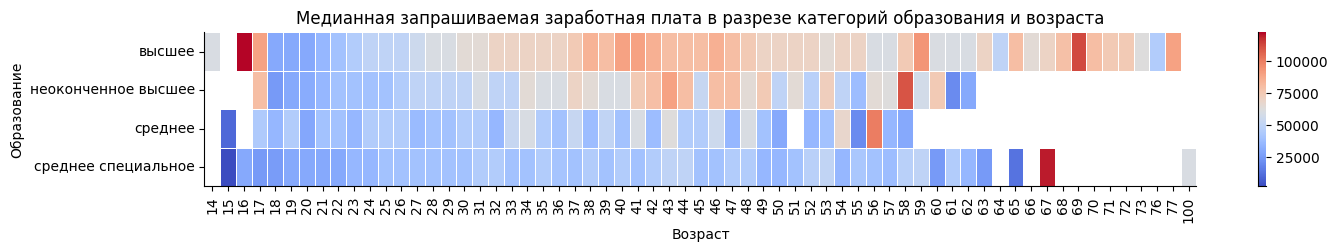

In [18]:
median_salary_pivot = hh_df.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc='median'
)

fig, axes = plt.subplots(figsize=(16, 2))
median_salary_hm = sns.heatmap(
    data=median_salary_pivot,
    cmap='coolwarm',
    linewidths=.5
)
median_salary_hm.set_title(
    'Медианная запрашиваемая заработная плата в разрезе категорий '
    'образования и возраста'
)
sns.despine()

**Выводы:** По тепловой карте видно, что для соискателей с высшим образованием *ЗЗП* растёт быстрее с возрастом, чем для соискателей с другим образованием. Далее по скорости роста заработной платы идут соискатели с неоконченным высшим образованием. У соискателей со средним специальным образованием наблюдается наименьший рост заработной платы. Также на графике хорошо видны бордовые значения "выбросов" для всех категорий образований. Значения возраста и признак образования важны при прогнозировании *ЗЗП* соискателей.

**8\.** Постройте диаграмму рассеяния, показывающую зависимость опыта работы («Опыт работы (месяц)») от возраста («Возраст»). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе.

Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше неё, — аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

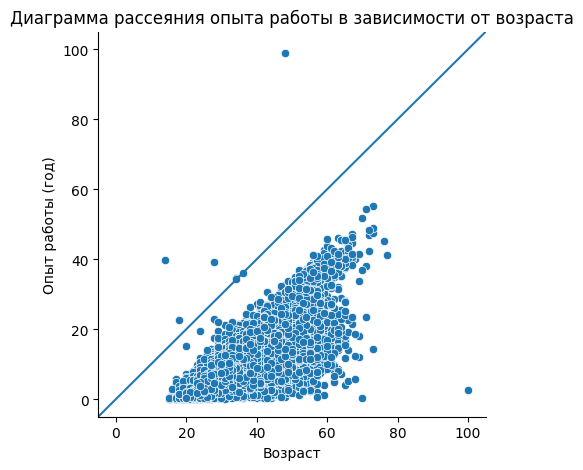

In [19]:
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'] / 12

fig, ax = plt.subplots(figsize=(5, 5))
sctrplt = sns.scatterplot(
    data=hh_df,
    x='Возраст',
    y='Опыт работы (год)'
)
sctrplt.axline((0, 0), (100, 100))
sctrplt.set_title('Диаграмма рассеяния опыта работы в зависимости от возраста')
sns.despine()

hh_df = hh_df.drop('Опыт работы (год)', axis=1)

**Вывод:** Исходя из диаграммы рассеяния в данных 7 выбросов, где опыт работы соискателя превышает возраст.

**Как получить дополнительные 2 балла за итоговый проект?**

Как вы понимаете, этим наше исследование не ограничивается: его можно значительно расширить. Для получения двух дополнительных баллов по разведывательному анализу постройте ещё два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков.

Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее, в разделе **Преобразование данных**.

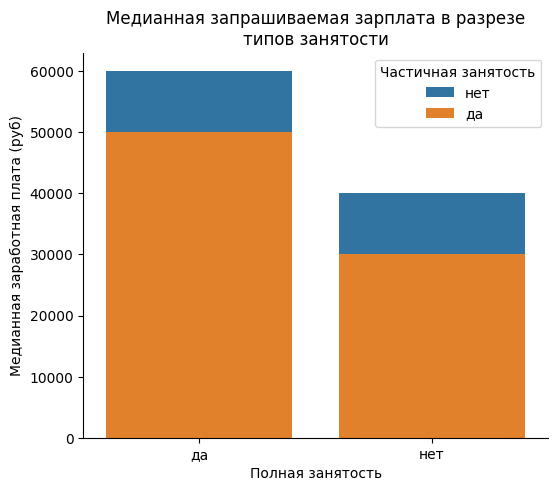

In [20]:
occupation_type = hh_df.groupby(
    ['Полная занятость', 'Частичная занятость'],
    as_index=False
    )['ЗП (руб)'].median()
occupation_type = occupation_type.sort_values(by='ЗП (руб)', ascending=False)

occupation_type['Полная занятость'] = \
    occupation_type['Полная занятость'].apply(
        lambda x: 'да' if x else 'нет'
    )
occupation_type['Частичная занятость'] = \
    occupation_type['Частичная занятость'].apply(
        lambda x: 'да' if x else 'нет'
    )

fig, axes = plt.subplots(figsize=(6, 5))
barplot = sns.barplot(
    data=occupation_type,
    x='Полная занятость',
    y='ЗП (руб)',
    hue='Частичная занятость',
    hue_order=['нет', 'да'],
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title(
    'Медианная запрашиваемая зарплата в разрезе\n'
    'типов занятости'
)
barplot.set_ylabel('Медианная заработная плата (руб)')
sns.despine()

**Вывод:** На первом графике, где показана зависимость *МЗЗП* в разрезе запросов по полной или частичной занятости. Видно, что соискатели, которые согласны на частичную занятость в среднем запрашивают меньшую заработную плату - 30.000 рублей (если не согласны на полную занятость) и 50.000 рублей (если согласны на полную занятость). Если соискатели не согласны на частичную занятость, они запрашивают большую *МЗЗП* - 40.000 рублей (если не согласны на полную занятость) и 60.000 рублей (если согласны на полную занятость). Максимальный запрос на заработную плату у соискателей, которые ориентируются только на полную занятость - 60.000 рублей. Признаки типа занятости важны при прогнозировании *ЗЗП* соискателей.

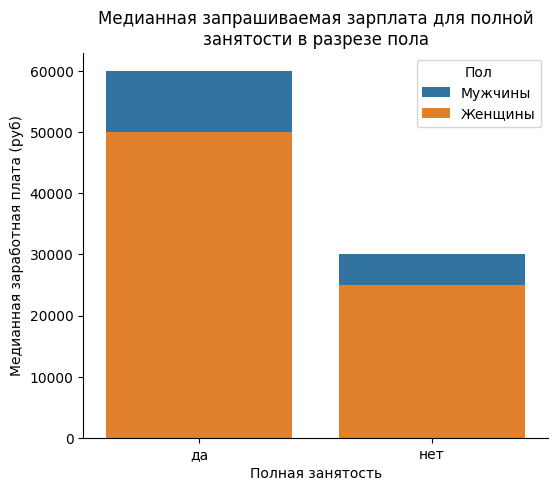

In [21]:
gender_salary = hh_df.groupby(
    ['Пол', 'Полная занятость'],
    as_index=False
)['ЗП (руб)'].median()
gender_salary = gender_salary.sort_values(by='ЗП (руб)', ascending=False)

gender_salary['Пол'] = \
    gender_salary['Пол'].apply(lambda x: 'Женщины' if x == 'Ж' else 'Мужчины')

gender_salary['Полная занятость'] = \
    gender_salary['Полная занятость'].apply(lambda x: 'да' if x else 'нет')

fig, axes = plt.subplots(figsize=(6, 5))
barplot = sns.barplot(
    data=gender_salary,
    x='Полная занятость',
    y='ЗП (руб)',
    hue='Пол',
    hue_order=['Мужчины', 'Женщины'],
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title(
    'Медианная запрашиваемая зарплата для полной\n'
    'занятости в разрезе пола'
)
barplot.set_ylabel('Медианная заработная плата (руб)')
sns.despine()

**Вывод:** На графике - показана зависимость *МЗЗП* в разрезе полной занятости и пола. Видно, что женщины запрашивают меньше медианной заработной платы, относительно мужчин - на 10.000 рублей (если они претендуют на вакансию с полной занятостью) и на 5.000 рублей (если не согласны на полную занятость), в абсолютном выражении *МЗЗП* у женщин составляет 50.000 рублей и 25.000 рублей соответственно. Также из графика видно, что соискатели вне зависимости от пола, при согласии на полную занятость, запрашивают медианную заработную плату в два раза больше, чем при несогласии на полную занятость, у мужчин 60.000 и 30.000 рублей, у женщин 50.000 и 30.000 рублей, соответственно. Признаки типа занятости и пола важны при прогнозировании ЗЗП соискателей.

# Очистка данных

**1\.** Начнём с дубликатов в наших данных. Найдите полные дубликаты в таблице с резюме и удалите их.

In [22]:
hh_df = hh_df.drop_duplicates()

**2\.** Займёмся пропусками. Выведите информацию о числе пропусков в столбцах.

In [23]:
cols_series = hh_df.isna().sum()
cols_series[cols_series > 0].reset_index()

,index,0
0,Последнее/нынешнее место работы,1
1,Последняя/нынешняя должность,2
2,Опыт работы (месяц),168


**3\.** Итак, у нас есть пропуски в трёх столбцах: «Опыт работы (месяц)», «Последнее/нынешнее место работы», «Последняя/нынешняя должность». Поступим следующим образом: **удалите строки, где есть пропуск в столбцах с местом работы и должностью**.

Пропуски в столбце с опытом работы заполните медианным значением.

In [24]:
hh_df = hh_df.fillna(
    {'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median()}
)
hh_df = hh_df.dropna(how='any', axis=0)

**4\.** Мы добрались до ликвидации выбросов. Сначала очистим данные вручную.

Удалите резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

In [25]:
salary_mask = (hh_df['ЗП (руб)'] >= 1000) & (hh_df['ЗП (руб)'] <= 1000000)
hh_df = hh_df[salary_mask]

**5\.** В процессе разведывательного анализа мы обнаружили резюме, в которых опыт работы в годах превышал возраст соискателя. Найдите такие резюме и удалите их из данных.

In [26]:
age_mask = hh_df['Опыт работы (месяц)']/12 < hh_df['Возраст']
hh_df = hh_df[age_mask]

**6\.** В результате анализа мы обнаружили потенциальные выбросы в признаке *Возраст*. Это оказались резюме людей, чей возраст слишком преклонный для поиска работы.

Попробуйте построить распределение признака в логарифмическом масштабе. Добавьте к графику линии, отображающие среднее и границы интервала метода *трёх сигм*. Напомним, сделать это можно с помощью метода **axvline**. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику. Найдите выбросы с помощью метода *z*-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем "послабление" на 1 сигму (возьмите 4 сигмы) в правую сторону. Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

,index,Возраст
0,31137,15
1,32950,15
2,33654,100


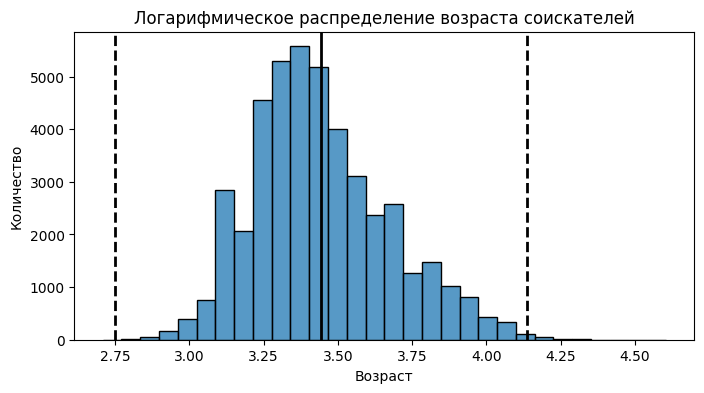

In [27]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


hh_age = np.log(hh_df['Возраст'])

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
histplot = sns.histplot(hh_age, bins=30, ax=ax)
histplot.axvline(hh_age.mean(), color='k', lw=2)
histplot.axvline(hh_age.mean() + 3 * hh_age.std(), color='k', ls='--', lw=2)
histplot.axvline(hh_age.mean() - 3 * hh_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Логарифмическое распределение возраста соискателей')
histplot.set_ylabel('Количество')

outliers, hh_df = outliers_z_score_mod(
    hh_df,
    'Возраст',
    log_scale=True,
    right=4  # "Послабление" на 1 сигму вправо
)
display(outliers['Возраст'].reset_index())

**Комментарий:** Логарифмическе распределение возраста соискателей - имеет правостороннюю асимметрию (уклон 0.45). Под категорию выбросов попали два соискателя с возрастом в 15 лет и один соискатель с возрастом - 100 лет.